# Machine learning models
This notebook shows an example of how to use the machine learning models provided in the Toolbox. They can be imported directly from the ``Models`` module or using the ``Models.model_catalog``.

Make sure to download the model's weights from the Github releases or by running the ``download_data.py`` script.

In [ ]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

from toolbox import Models
from toolbox import Structures
from toolbox import Visualization

In [3]:
for name, model in Models.model_catalog.items():
    print(name, model)

age_gender <class 'toolbox.Models.age_gender.AgeGenderPredictor.AgeGenderPredictor'>
face_detector_ultraface <class 'toolbox.Models.face_detector_ultraface.FaceDetector.FaceDetector'>
detectron2 <class 'toolbox.Models.detectron2.Detectron2.Detectron2'>
emotions_hse <class 'toolbox.Models.emotions_hse.EmotionsClassifier.EmotionsClassifier'>
face_recognition_facenet <class 'toolbox.Models.face_recognition_facenet.FaceRecognition.FaceRecognition'>
face_detector_retinaface <class 'toolbox.Models.face_detector_retinaface.FaceDetector.FaceDetector'>


Create an instance segmentation model.

In [4]:
det2 = Models.detectron2.Detectron2(
    model_config="../../data/models/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/mask_rcnn_R_50_FPN_3x.yaml",
    model_weights="../../data/models/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/model_final_f10217.pkl",
    use_cuda=False
)

Predict an image with the model.

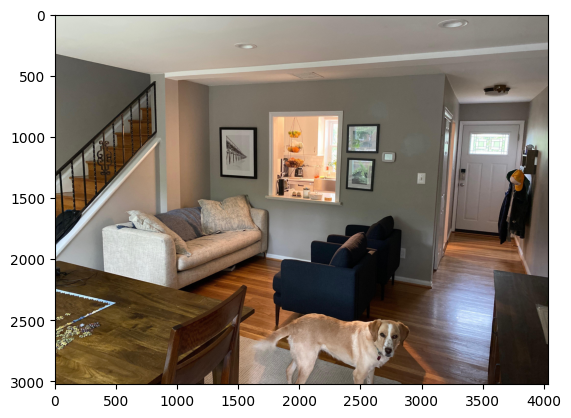

In [5]:
# Read an image
image = cv2.imread("../../data/samples/images/general/house_00.jpg")
plt.imshow(image[:,:,::-1]) # Convert the image from BGR to RGB and show it

# Predict the image
instances = det2.predict(image)

Machine learning models always return a list of ``Instance`` objects which store the data of each detected object. Instances are composed of simple Python types like strings or floats or more complex classes defined in ``toolbox.Structures`` like ``BoundingBox`` or ``SegmentationMask``.

In [6]:
print("Number of detected object:", len(instances))
print("Output fields:", instances[0].fields)
for ins in instances:
    print(f"Label: {ins.label} - {ins.label_id} ({ins.confidence}): {ins.bounding_box}, {ins.mask}")

Number of detected object: 8
Output fields: ['confidence', 'label_id', 'label', 'bounding_box', 'mask']
Label: dog - 16 (0.9980881810188293): BoundingBox(0.403,0.806,0.723,0.992), SegmentationMask (4032 X 3024)
Label: chair - 56 (0.9835169911384583): BoundingBox(0.206,0.726,0.393,0.998), SegmentationMask (4032 X 3024)
Label: couch - 57 (0.964159369468689): BoundingBox(0.106,0.494,0.438,0.750), SegmentationMask (4032 X 3024)
Label: dining table - 60 (0.9139987230300903): BoundingBox(0.005,0.662,0.373,0.987), SegmentationMask (4032 X 3024)
Label: chair - 56 (0.8410733938217163): BoundingBox(0.439,0.601,0.654,0.855), SegmentationMask (4032 X 3024)
Label: chair - 56 (0.8362091183662415): BoundingBox(0.556,0.549,0.702,0.736), SegmentationMask (4032 X 3024)
Label: vase - 75 (0.5476816296577454): BoundingBox(0.486,0.415,0.504,0.441), SegmentationMask (4032 X 3024)
Label: potted plant - 58 (0.5424181222915649): BoundingBox(0.464,0.389,0.507,0.442), SegmentationMask (4032 X 3024)


The Toolbox also offers methods to visualize the models' output.

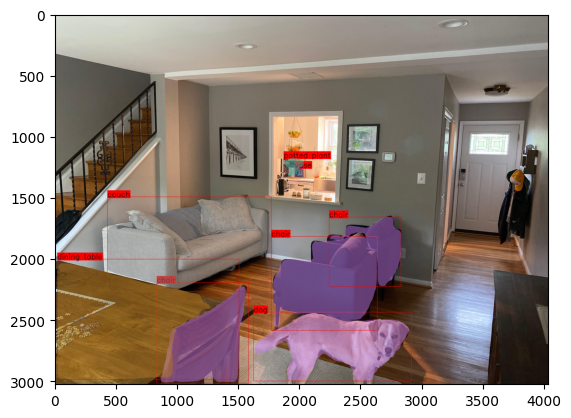

In [7]:
# Draw the bounding box, label and segmentation mask of the detected objects
image_vis = image.copy()
for ins in instances:
    image_vis = Visualization.utils.draw_bounding_box(
        image=image_vis,
        box=ins.bounding_box,
        text=ins.label
    )
    img_vis = Visualization.utils.draw_mask(
        image=image_vis,
        mask=ins.mask,
        color_by_label=True,
        label_id=ins.label_id
    )

plt.imshow(img_vis[:,:,::-1])